# Hotel Queries in Jupyter Notebook

In [2]:
# Test database connection
import psycopg2

def test_connection():
    try:
        conn = psycopg2.connect(**DB_SETTINGS)
        print("✅ Database connection successful!")
        
        # Test a simple query
        cursor = conn.cursor()
        cursor.execute("SELECT COUNT(*) FROM hilton_visitor;")
        hilton_count = cursor.fetchone()[0]
        cursor.execute("SELECT COUNT(*) FROM fourseasons_visitor;")
        fourseasons_count = cursor.fetchone()[0]
        cursor.execute("SELECT COUNT(*) FROM marriott_visitor;")
        marriott_count = cursor.fetchone()[0]
        cursor.execute("SELECT COUNT(*) FROM shangri_visitor;")
        shangri_count = cursor.fetchone()[0]
        
        print(f"✅ Data loaded successfully:")
        print(f"   - Hilton visitors: {hilton_count}")
        print(f"   - Four Seasons visitors: {fourseasons_count}")
        print(f"   - Marriott visitors: {marriott_count}")
        print(f"   - Shangri-La visitors: {shangri_count}")
        
        conn.close()
        print("✅ Connection closed successfully")
        return True
        
    except Exception as e:
        print(f"❌ Database connection failed: {e}")
        return False

# Run the test
test_connection()


✅ Database connection successful!
✅ Data loaded successfully:
   - Hilton visitors: 1000
   - Four Seasons visitors: 1000
   - Marriott visitors: 1000
   - Shangri-La visitors: 1000
✅ Connection closed successfully


True

In [4]:

import psycopg2
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

DB_SETTINGS = {
    'dbname': 'class_project',
    'user': 'test',
    'password': 'test',
    'host': 'localhost',
    'port': '5432'
}

def connect_db():
    return psycopg2.connect(**DB_SETTINGS)

def fetch_dataframe(query):
    conn = connect_db()
    df = pd.read_sql(query, conn)
    conn.close()
    return df

def plot_combined_query(hotel_queries, x_col, y_col, title, kind='bar'):
    all_data = []
    for hotel, query in hotel_queries.items():
        df = fetch_dataframe(query)
        if not df.empty:
            df['Hotel'] = hotel
            all_data.append(df)
    if not all_data:
        print("No data available.")
        return
    df_all = pd.concat(all_data)
    plt.figure(figsize=(12, 7))
    if kind == 'bar':
        sns.barplot(data=df_all, x=x_col, y=y_col, hue='Hotel')
    elif kind == 'line':
        sns.lineplot(data=df_all, x=x_col, y=y_col, hue='Hotel', marker='o')
    plt.title(title)
    plt.xlabel(x_col)
    plt.ylabel(y_col)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()


C:\Users\domlu\AppData\Local\Temp\ipykernel_18428\2338532941.py:19: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)
C:\Users\domlu\AppData\Local\Temp\ipykernel_18428\2338532941.py:19: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)
C:\Users\domlu\AppData\Local\Temp\ipykernel_18428\2338532941.py:19: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)
C:\Users\domlu\AppData\Local\Temp\ipykernel_18428\2338532941.py:19: UserWarning: pandas only supp

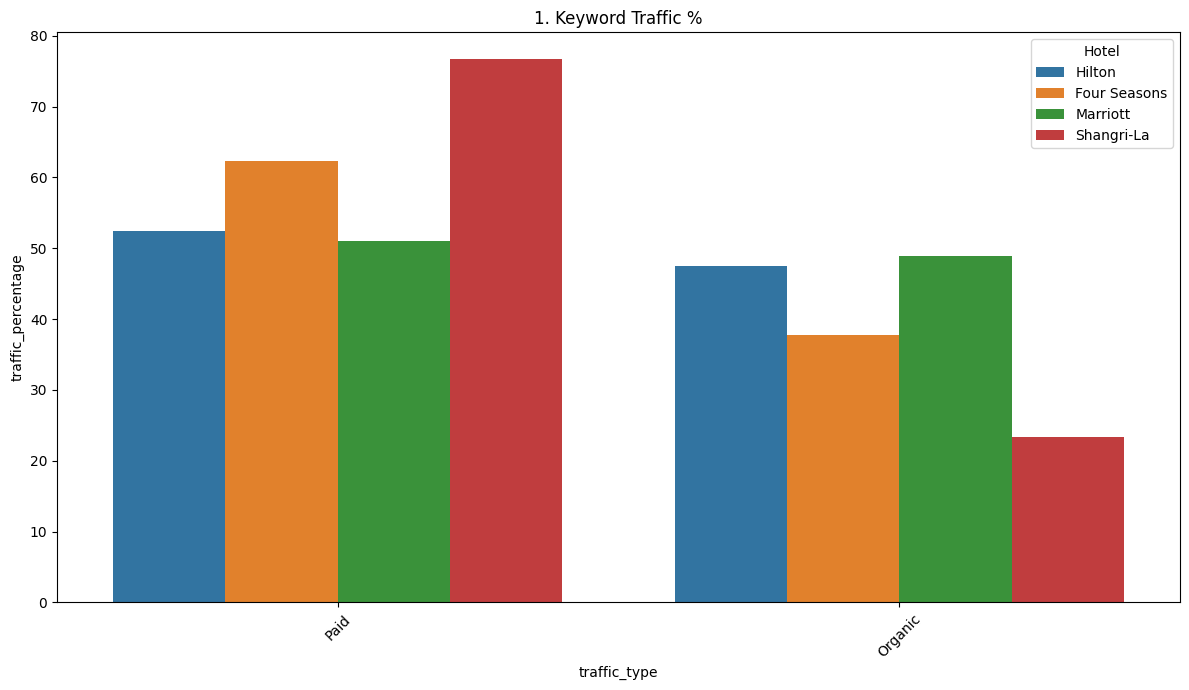

In [5]:
plot_combined_query({'Hilton': 'SELECT traffic_type, ROUND(100.0 * COUNT(*) / (SELECT COUNT(*) FROM hilton_access), 2) AS traffic_percentage FROM hilton_access a JOIN hilton_keyword k ON a.keyword_id = k.keyword_id GROUP BY traffic_type;', 'Four Seasons': 'SELECT traffic_type, ROUND(100.0 * COUNT(*) / (SELECT COUNT(*) FROM fourseasons_access), 2) AS traffic_percentage FROM fourseasons_access a JOIN fourseasons_keyword k ON a.keyword_id = k.keyword_id GROUP BY traffic_type;', 'Marriott': 'SELECT traffic_type, ROUND(100.0 * COUNT(*) / (SELECT COUNT(*) FROM marriott_access), 2) AS traffic_percentage FROM marriott_access a JOIN marriott_keyword k ON a.keyword_id = k.keyword_id GROUP BY traffic_type;', 'Shangri-La': 'SELECT traffic_type, ROUND(100.0 * COUNT(*) / (SELECT COUNT(*) FROM shangri_access), 2) AS traffic_percentage FROM shangri_access a JOIN shangri_keyword k ON a.keyword_id = k.keyword_id GROUP BY traffic_type;'}, 'traffic_type', 'traffic_percentage', '1. Keyword Traffic %', kind='bar')

C:\Users\domlu\AppData\Local\Temp\ipykernel_18428\2338532941.py:19: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)
C:\Users\domlu\AppData\Local\Temp\ipykernel_18428\2338532941.py:19: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)
C:\Users\domlu\AppData\Local\Temp\ipykernel_18428\2338532941.py:19: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)
C:\Users\domlu\AppData\Local\Temp\ipykernel_18428\2338532941.py:19: UserWarning: pandas only supp

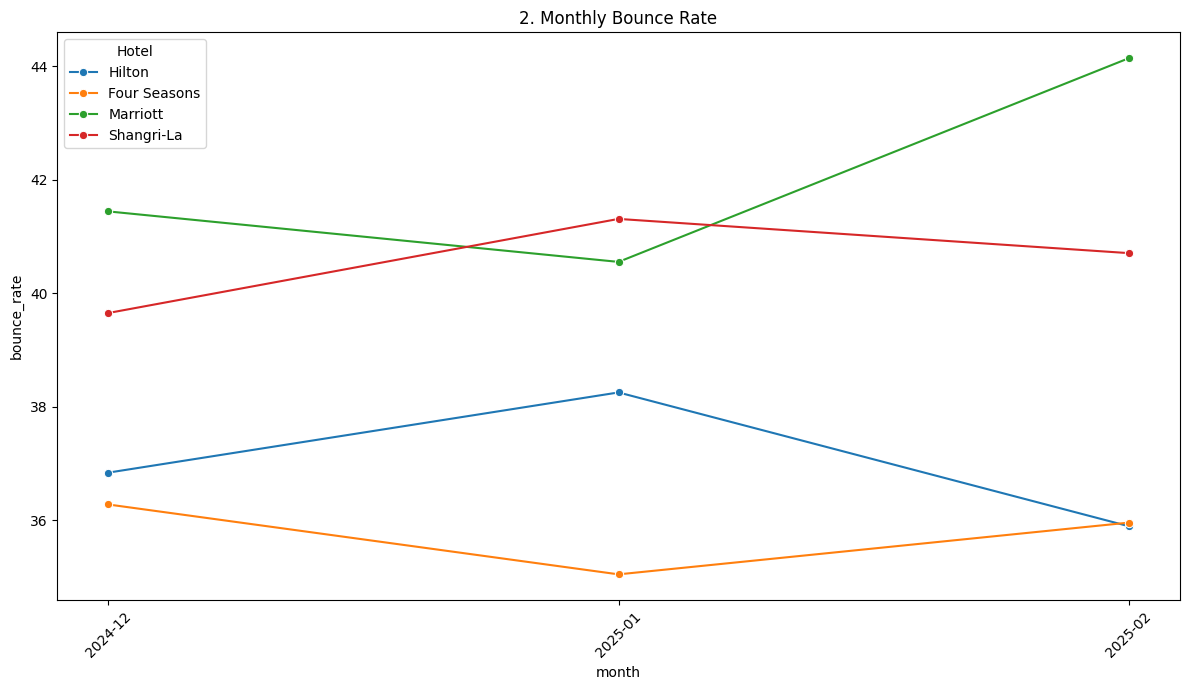

In [6]:
plot_combined_query({'Hilton': "SELECT TO_CHAR(access_date, 'YYYY-MM') AS month, COUNT(CASE WHEN pages_visited = '1' THEN 1 END) * 100.0 / COUNT(*) AS bounce_rate FROM hilton_access GROUP BY month ORDER BY month;", 'Four Seasons': "SELECT TO_CHAR(access_date, 'YYYY-MM') AS month, COUNT(CASE WHEN pages_visited = '1' THEN 1 END) * 100.0 / COUNT(*) AS bounce_rate FROM fourseasons_access GROUP BY month ORDER BY month;", 'Marriott': "SELECT TO_CHAR(access_date, 'YYYY-MM') AS month, COUNT(CASE WHEN pages_visited = '1' THEN 1 END) * 100.0 / COUNT(*) AS bounce_rate FROM marriott_access GROUP BY month ORDER BY month;", 'Shangri-La': "SELECT TO_CHAR(access_date, 'YYYY-MM') AS month, COUNT(CASE WHEN pages_visited = '1' THEN 1 END) * 100.0 / COUNT(*) AS bounce_rate FROM shangri_access GROUP BY month ORDER BY month;"}, 'month', 'bounce_rate', '2. Monthly Bounce Rate', kind='line')

C:\Users\domlu\AppData\Local\Temp\ipykernel_18428\2338532941.py:19: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)
C:\Users\domlu\AppData\Local\Temp\ipykernel_18428\2338532941.py:19: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)
C:\Users\domlu\AppData\Local\Temp\ipykernel_18428\2338532941.py:19: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)
C:\Users\domlu\AppData\Local\Temp\ipykernel_18428\2338532941.py:19: UserWarning: pandas only supp

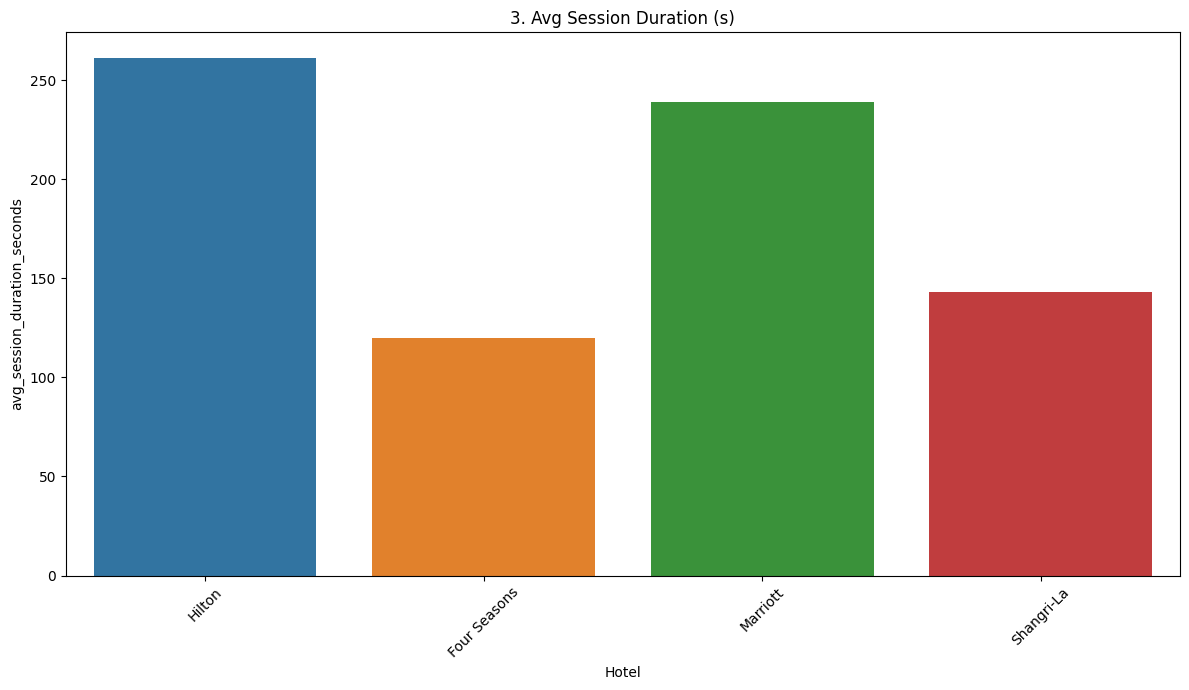

In [7]:
plot_combined_query({'Hilton': "SELECT 'Hilton' AS Hotel, ROUND(AVG(EXTRACT(EPOCH FROM session_duration)), 0) AS avg_session_duration_seconds FROM hilton_access;", 'Four Seasons': "SELECT 'Four Seasons' AS Hotel, ROUND(AVG(EXTRACT(EPOCH FROM session_duration)), 0) AS avg_session_duration_seconds FROM fourseasons_access;", 'Marriott': "SELECT 'Marriott' AS Hotel, ROUND(AVG(EXTRACT(EPOCH FROM session_duration)), 0) AS avg_session_duration_seconds FROM marriott_access;", 'Shangri-La': "SELECT 'Shangri-La' AS Hotel, ROUND(AVG(EXTRACT(EPOCH FROM session_duration)), 0) AS avg_session_duration_seconds FROM shangri_access;"}, 'Hotel', 'avg_session_duration_seconds', '3. Avg Session Duration (s)', kind='bar')

C:\Users\domlu\AppData\Local\Temp\ipykernel_18428\2338532941.py:19: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)
C:\Users\domlu\AppData\Local\Temp\ipykernel_18428\2338532941.py:19: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)
C:\Users\domlu\AppData\Local\Temp\ipykernel_18428\2338532941.py:19: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)
C:\Users\domlu\AppData\Local\Temp\ipykernel_18428\2338532941.py:19: UserWarning: pandas only supp

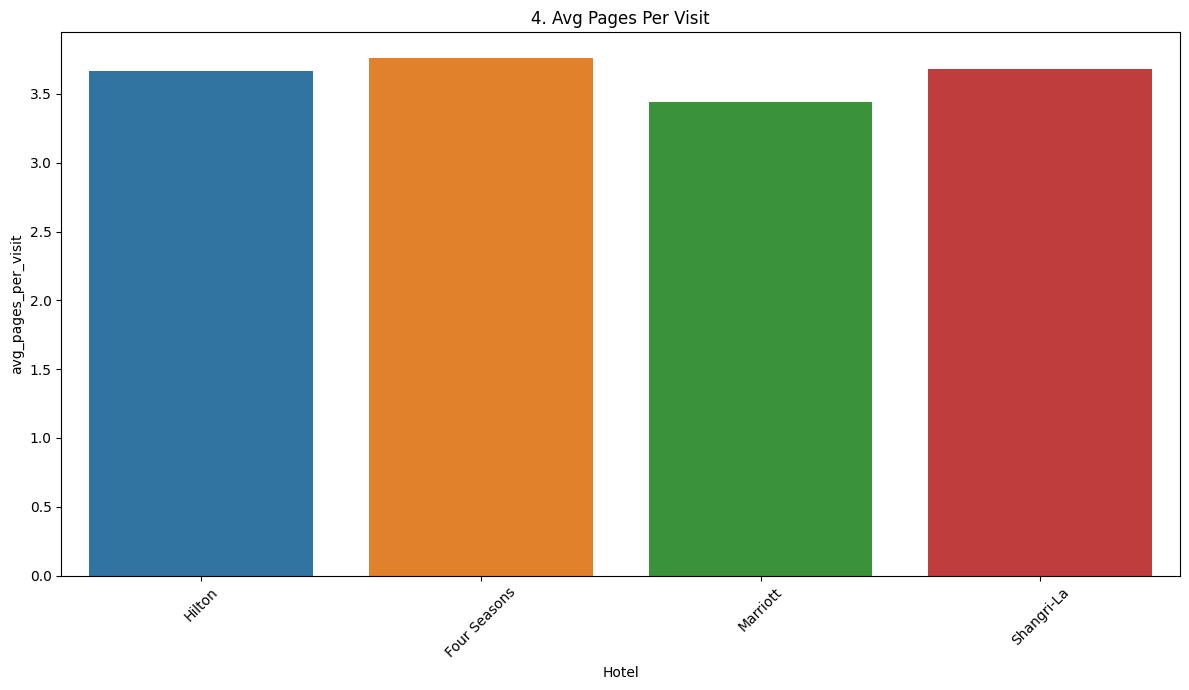

In [8]:
plot_combined_query({'Hilton': "SELECT 'Hilton' AS Hotel, ROUND(AVG(CAST(pages_visited AS INTEGER)), 2) AS avg_pages_per_visit FROM hilton_access;", 'Four Seasons': "SELECT 'Four Seasons' AS Hotel, ROUND(AVG(CAST(pages_visited AS INTEGER)), 2) AS avg_pages_per_visit FROM fourseasons_access;", 'Marriott': "SELECT 'Marriott' AS Hotel, ROUND(AVG(CAST(pages_visited AS INTEGER)), 2) AS avg_pages_per_visit FROM marriott_access;", 'Shangri-La': "SELECT 'Shangri-La' AS Hotel, ROUND(AVG(CAST(pages_visited AS INTEGER)), 2) AS avg_pages_per_visit FROM shangri_access;"}, 'Hotel', 'avg_pages_per_visit', '4. Avg Pages Per Visit', kind='bar')

C:\Users\domlu\AppData\Local\Temp\ipykernel_18428\2338532941.py:19: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)
C:\Users\domlu\AppData\Local\Temp\ipykernel_18428\2338532941.py:19: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)
C:\Users\domlu\AppData\Local\Temp\ipykernel_18428\2338532941.py:19: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)
C:\Users\domlu\AppData\Local\Temp\ipykernel_18428\2338532941.py:19: UserWarning: pandas only supp

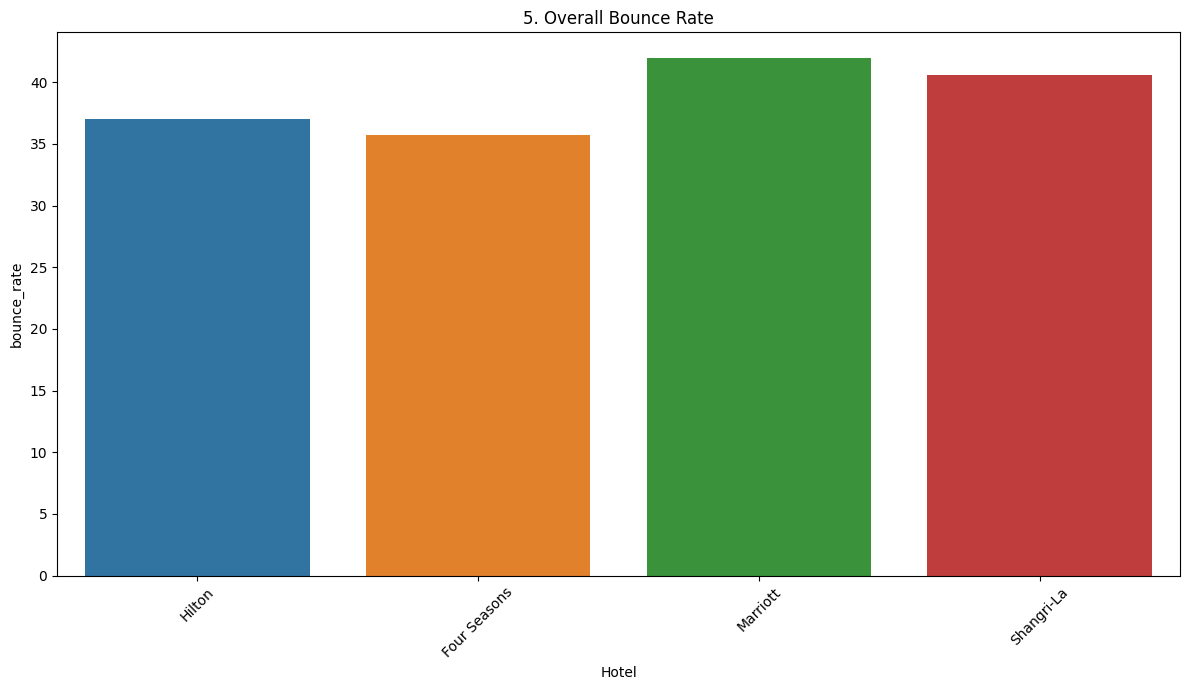

In [9]:
plot_combined_query({'Hilton': "SELECT 'Hilton' AS Hotel, ROUND(SUM(CASE WHEN pages_visited = '1' THEN 1 ELSE 0 END) * 100.0 / COUNT(*), 2) AS bounce_rate FROM hilton_access;", 'Four Seasons': "SELECT 'Four Seasons' AS Hotel, ROUND(SUM(CASE WHEN pages_visited = '1' THEN 1 ELSE 0 END) * 100.0 / COUNT(*), 2) AS bounce_rate FROM fourseasons_access;", 'Marriott': "SELECT 'Marriott' AS Hotel, ROUND(SUM(CASE WHEN pages_visited = '1' THEN 1 ELSE 0 END) * 100.0 / COUNT(*), 2) AS bounce_rate FROM marriott_access;", 'Shangri-La': "SELECT 'Shangri-La' AS Hotel, ROUND(SUM(CASE WHEN pages_visited = '1' THEN 1 ELSE 0 END) * 100.0 / COUNT(*), 2) AS bounce_rate FROM shangri_access;"}, 'Hotel', 'bounce_rate', '5. Overall Bounce Rate', kind='bar')

C:\Users\domlu\AppData\Local\Temp\ipykernel_18428\2338532941.py:19: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)
C:\Users\domlu\AppData\Local\Temp\ipykernel_18428\2338532941.py:19: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)
C:\Users\domlu\AppData\Local\Temp\ipykernel_18428\2338532941.py:19: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)
C:\Users\domlu\AppData\Local\Temp\ipykernel_18428\2338532941.py:19: UserWarning: pandas only supp

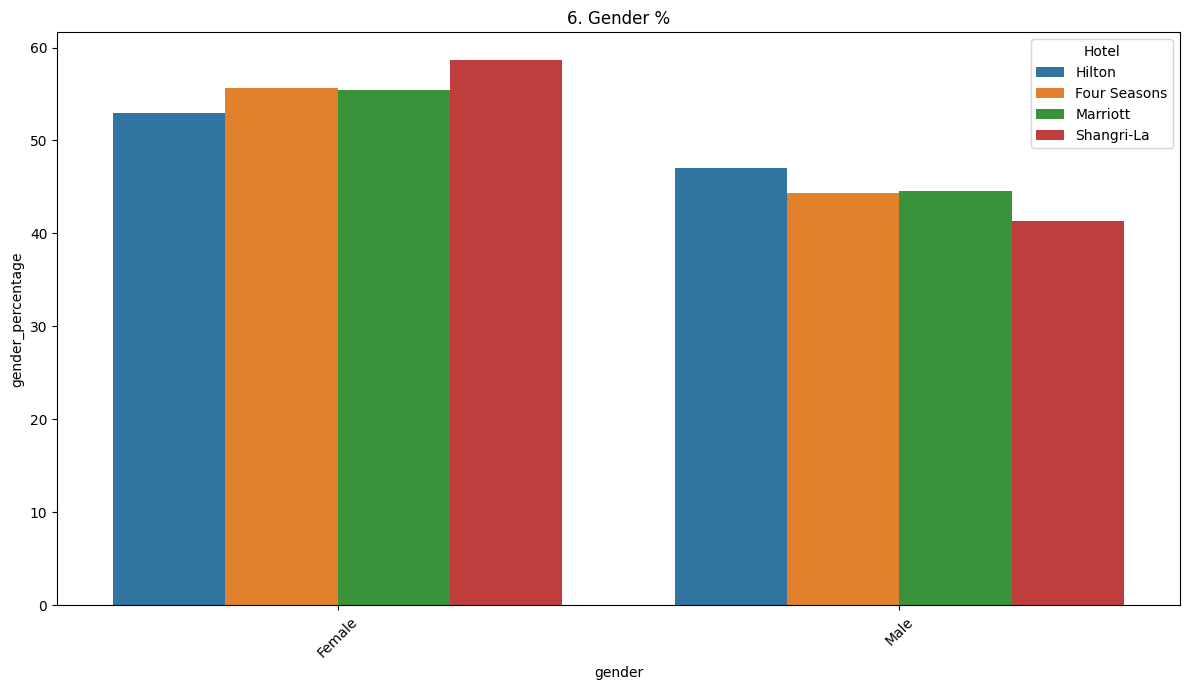

In [10]:
plot_combined_query({'Hilton': 'SELECT gender, ROUND(100.0 * COUNT(*) / (SELECT COUNT(*) FROM hilton_visitor), 2) AS gender_percentage FROM hilton_visitor GROUP BY gender;', 'Four Seasons': 'SELECT gender, ROUND(100.0 * COUNT(*) / (SELECT COUNT(*) FROM fourseasons_visitor), 2) AS gender_percentage FROM fourseasons_visitor GROUP BY gender;', 'Marriott': 'SELECT gender, ROUND(100.0 * COUNT(*) / (SELECT COUNT(*) FROM marriott_visitor), 2) AS gender_percentage FROM marriott_visitor GROUP BY gender;', 'Shangri-La': 'SELECT gender, ROUND(100.0 * COUNT(*) / (SELECT COUNT(*) FROM shangri_visitor), 2) AS gender_percentage FROM shangri_visitor GROUP BY gender;'}, 'gender', 'gender_percentage', '6. Gender %', kind='bar')

C:\Users\domlu\AppData\Local\Temp\ipykernel_18428\2338532941.py:19: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)
C:\Users\domlu\AppData\Local\Temp\ipykernel_18428\2338532941.py:19: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)
C:\Users\domlu\AppData\Local\Temp\ipykernel_18428\2338532941.py:19: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)
C:\Users\domlu\AppData\Local\Temp\ipykernel_18428\2338532941.py:19: UserWarning: pandas only supp

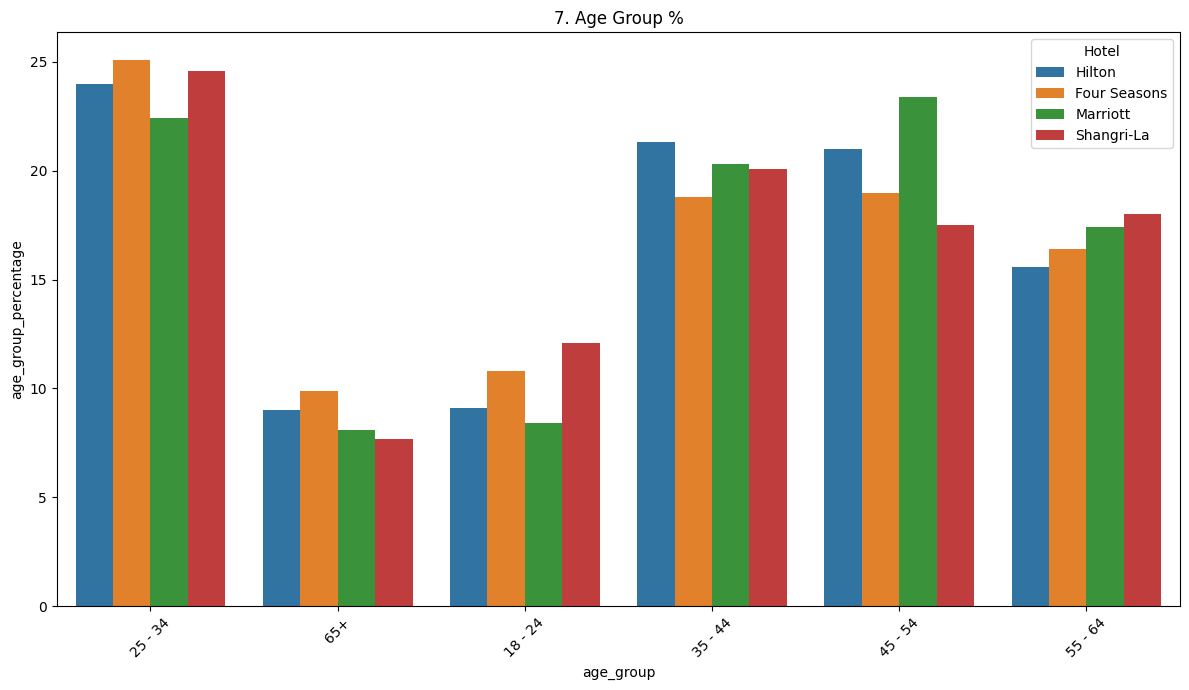

In [11]:
plot_combined_query({'Hilton': 'SELECT age_group, ROUND(100.0 * COUNT(*) / (SELECT COUNT(*) FROM hilton_visitor), 2) AS age_group_percentage FROM hilton_visitor GROUP BY age_group;', 'Four Seasons': 'SELECT age_group, ROUND(100.0 * COUNT(*) / (SELECT COUNT(*) FROM fourseasons_visitor), 2) AS age_group_percentage FROM fourseasons_visitor GROUP BY age_group;', 'Marriott': 'SELECT age_group, ROUND(100.0 * COUNT(*) / (SELECT COUNT(*) FROM marriott_visitor), 2) AS age_group_percentage FROM marriott_visitor GROUP BY age_group;', 'Shangri-La': 'SELECT age_group, ROUND(100.0 * COUNT(*) / (SELECT COUNT(*) FROM shangri_visitor), 2) AS age_group_percentage FROM shangri_visitor GROUP BY age_group;'}, 'age_group', 'age_group_percentage', '7. Age Group %', kind='bar')

C:\Users\domlu\AppData\Local\Temp\ipykernel_18428\2338532941.py:19: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)
C:\Users\domlu\AppData\Local\Temp\ipykernel_18428\2338532941.py:19: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)
C:\Users\domlu\AppData\Local\Temp\ipykernel_18428\2338532941.py:19: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)
C:\Users\domlu\AppData\Local\Temp\ipykernel_18428\2338532941.py:19: UserWarning: pandas only supp

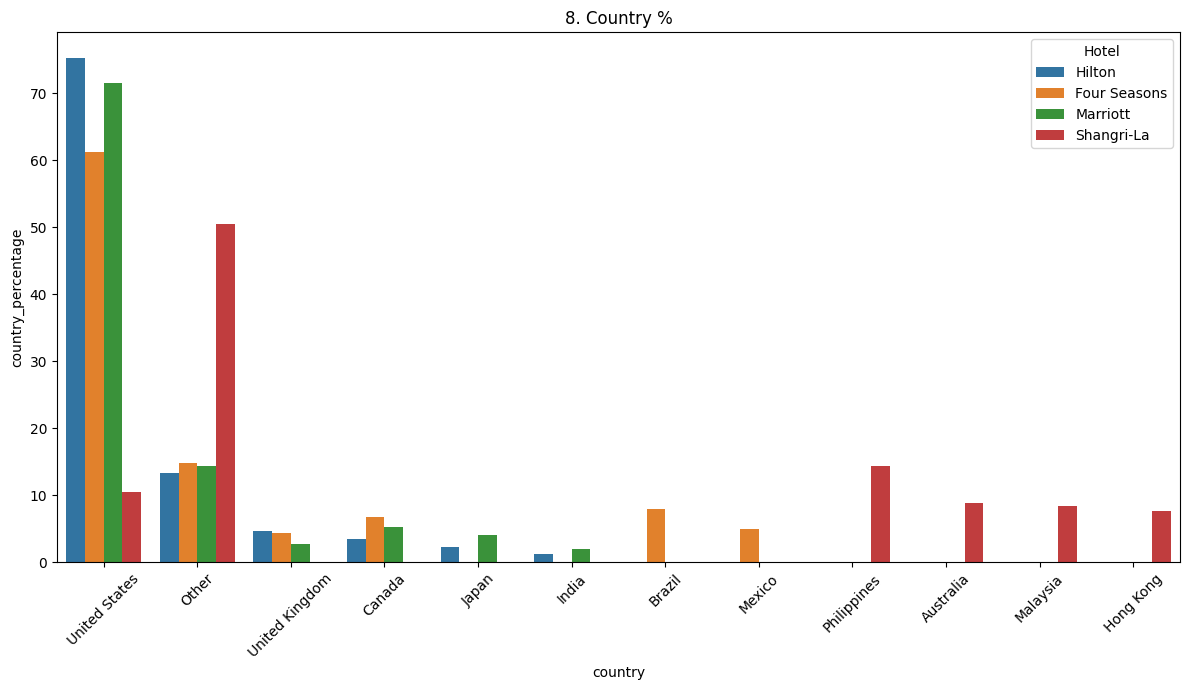

In [17]:
plot_combined_query({'Hilton': 'SELECT country, ROUND(100.0 * COUNT(*) / (SELECT COUNT(*) FROM hilton_visitor), 2) AS country_percentage FROM hilton_visitor GROUP BY country ORDER BY country_percentage DESC;', 'Four Seasons': 'SELECT country, ROUND(100.0 * COUNT(*) / (SELECT COUNT(*) FROM fourseasons_visitor), 2) AS country_percentage FROM fourseasons_visitor GROUP BY country ORDER BY country_percentage DESC;', 'Marriott': 'SELECT country, ROUND(100.0 * COUNT(*) / (SELECT COUNT(*) FROM marriott_visitor), 2) AS country_percentage FROM marriott_visitor GROUP BY country ORDER BY country_percentage DESC;', 'Shangri-La': 'SELECT country, ROUND(100.0 * COUNT(*) / (SELECT COUNT(*) FROM shangri_visitor), 2) AS country_percentage FROM shangri_visitor GROUP BY country ORDER BY country_percentage DESC;'}, 'country', 'country_percentage', '8. Country %', kind='bar')

C:\Users\domlu\AppData\Local\Temp\ipykernel_18428\2338532941.py:19: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)
C:\Users\domlu\AppData\Local\Temp\ipykernel_18428\2338532941.py:19: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)
C:\Users\domlu\AppData\Local\Temp\ipykernel_18428\2338532941.py:19: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)
C:\Users\domlu\AppData\Local\Temp\ipykernel_18428\2338532941.py:19: UserWarning: pandas only supp

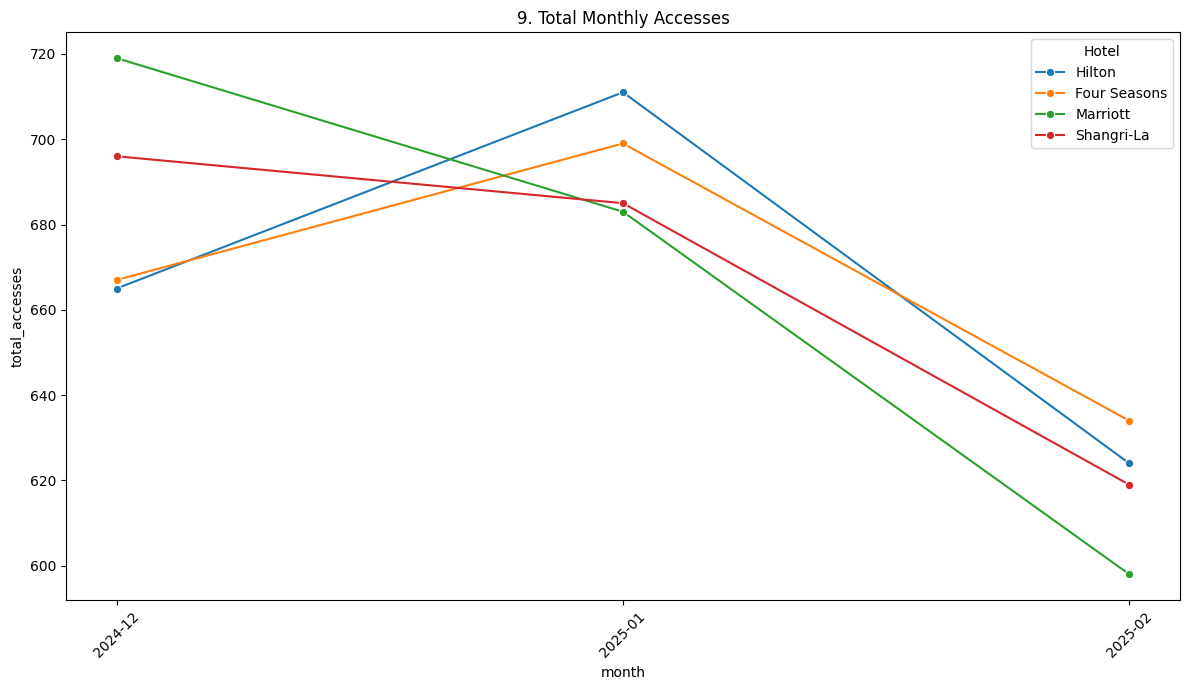

In [16]:
plot_combined_query({'Hilton': "SELECT TO_CHAR(access_date, 'YYYY-MM') AS month, COUNT(*) AS total_accesses FROM hilton_access GROUP BY month ORDER BY month;", 'Four Seasons': "SELECT TO_CHAR(access_date, 'YYYY-MM') AS month, COUNT(*) AS total_accesses FROM fourseasons_access GROUP BY month ORDER BY month;", 'Marriott': "SELECT TO_CHAR(access_date, 'YYYY-MM') AS month, COUNT(*) AS total_accesses FROM marriott_access GROUP BY month ORDER BY month;", 'Shangri-La': "SELECT TO_CHAR(access_date, 'YYYY-MM') AS month, COUNT(*) AS total_accesses FROM shangri_access GROUP BY month ORDER BY month;"}, 'month', 'total_accesses', '9. Total Monthly Accesses', kind='line')

C:\Users\domlu\AppData\Local\Temp\ipykernel_18428\2338532941.py:19: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)
C:\Users\domlu\AppData\Local\Temp\ipykernel_18428\2338532941.py:19: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)
C:\Users\domlu\AppData\Local\Temp\ipykernel_18428\2338532941.py:19: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)
C:\Users\domlu\AppData\Local\Temp\ipykernel_18428\2338532941.py:19: UserWarning: pandas only supp

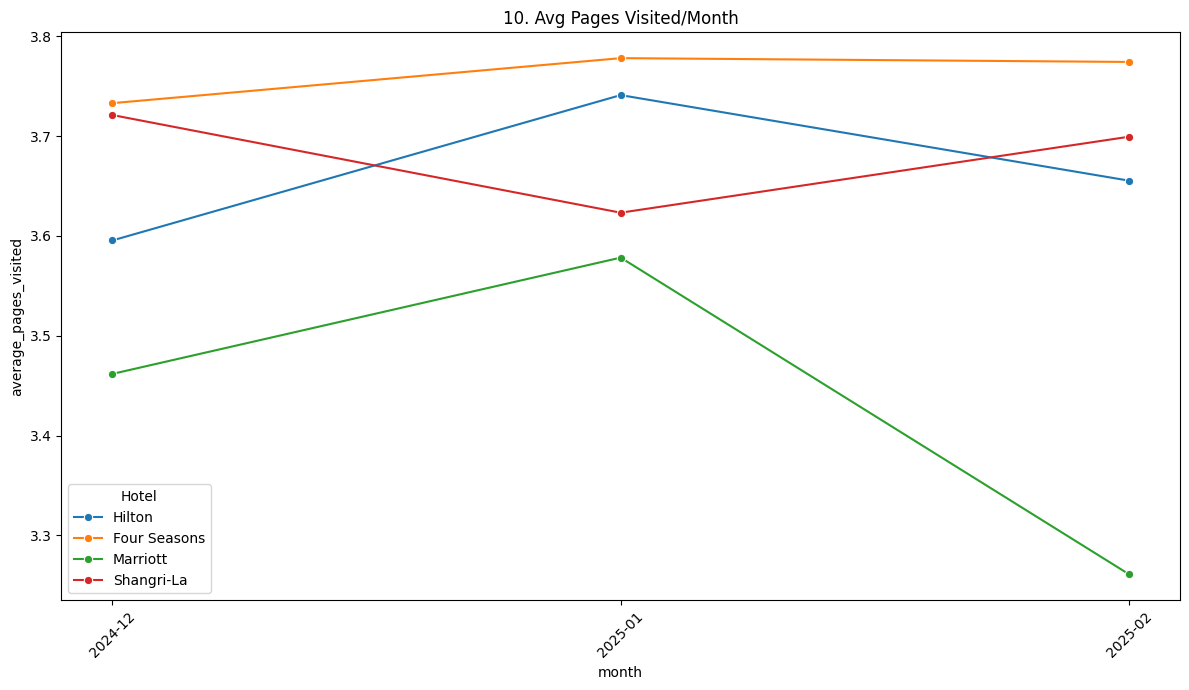

In [15]:
plot_combined_query({'Hilton': "SELECT TO_CHAR(access_date, 'YYYY-MM') AS month, AVG(CAST(pages_visited AS INTEGER)) AS average_pages_visited FROM hilton_access GROUP BY month ORDER BY month;", 'Four Seasons': "SELECT TO_CHAR(access_date, 'YYYY-MM') AS month, AVG(CAST(pages_visited AS INTEGER)) AS average_pages_visited FROM fourseasons_access GROUP BY month ORDER BY month;", 'Marriott': "SELECT TO_CHAR(access_date, 'YYYY-MM') AS month, AVG(CAST(pages_visited AS INTEGER)) AS average_pages_visited FROM marriott_access GROUP BY month ORDER BY month;", 'Shangri-La': "SELECT TO_CHAR(access_date, 'YYYY-MM') AS month, AVG(CAST(pages_visited AS INTEGER)) AS average_pages_visited FROM shangri_access GROUP BY month ORDER BY month;"}, 'month', 'average_pages_visited', '10. Avg Pages Visited/Month', kind='line')

C:\Users\domlu\AppData\Local\Temp\ipykernel_18428\2338532941.py:19: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)
C:\Users\domlu\AppData\Local\Temp\ipykernel_18428\2338532941.py:19: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)
C:\Users\domlu\AppData\Local\Temp\ipykernel_18428\2338532941.py:19: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)
C:\Users\domlu\AppData\Local\Temp\ipykernel_18428\2338532941.py:19: UserWarning: pandas only supp

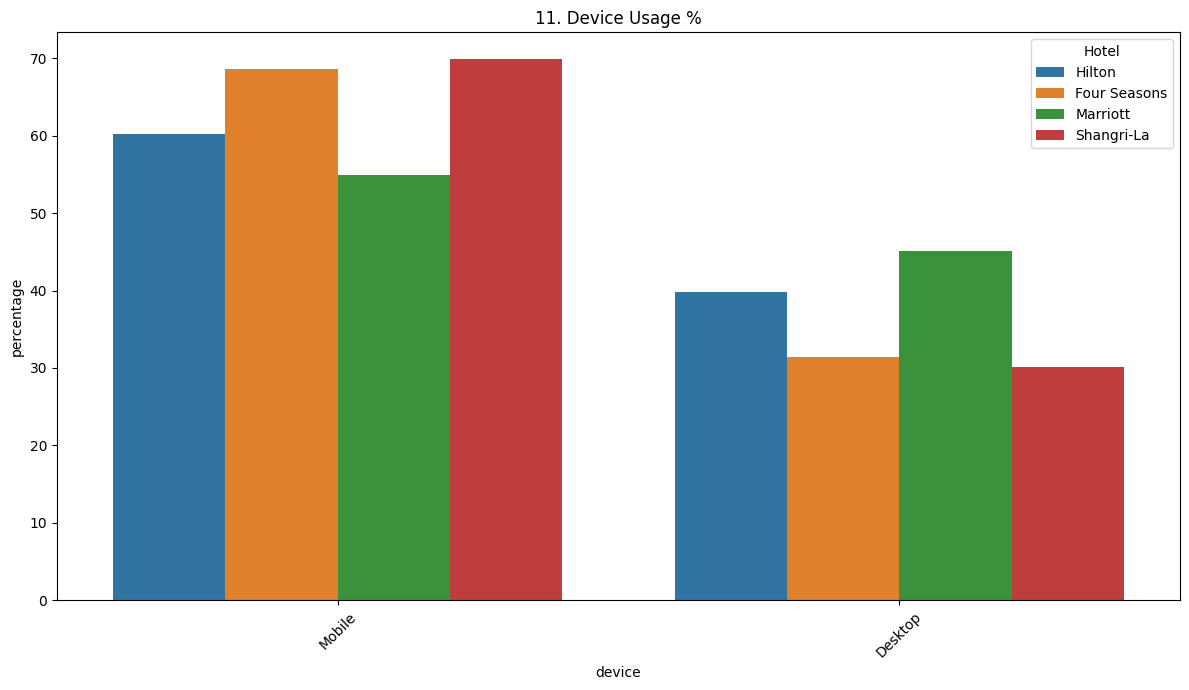

In [14]:
plot_combined_query({'Hilton': 'SELECT device, ROUND((COUNT(*) * 100.0 / (SELECT COUNT(*) FROM hilton_access)), 2) AS percentage FROM hilton_access GROUP BY device ORDER BY percentage DESC;', 'Four Seasons': 'SELECT device, ROUND((COUNT(*) * 100.0 / (SELECT COUNT(*) FROM fourseasons_access)), 2) AS percentage FROM fourseasons_access GROUP BY device ORDER BY percentage DESC;', 'Marriott': 'SELECT device, ROUND((COUNT(*) * 100.0 / (SELECT COUNT(*) FROM marriott_access)), 2) AS percentage FROM marriott_access GROUP BY device ORDER BY percentage DESC;', 'Shangri-La': 'SELECT device, ROUND((COUNT(*) * 100.0 / (SELECT COUNT(*) FROM shangri_access)), 2) AS percentage FROM shangri_access GROUP BY device ORDER BY percentage DESC;'}, 'device', 'percentage', '11. Device Usage %', kind='bar')

C:\Users\domlu\AppData\Local\Temp\ipykernel_18428\2338532941.py:19: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)
C:\Users\domlu\AppData\Local\Temp\ipykernel_18428\2338532941.py:19: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)
C:\Users\domlu\AppData\Local\Temp\ipykernel_18428\2338532941.py:19: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)
C:\Users\domlu\AppData\Local\Temp\ipykernel_18428\2338532941.py:19: UserWarning: pandas only supp

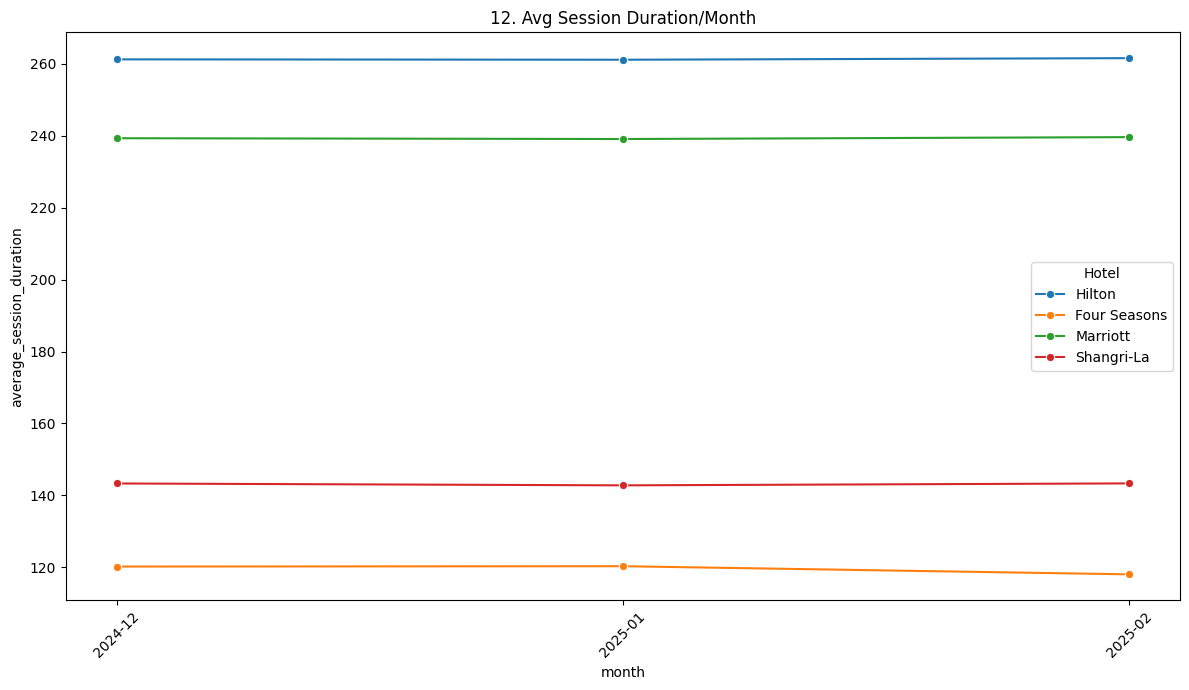

In [13]:
plot_combined_query({'Hilton': "SELECT TO_CHAR(access_date, 'YYYY-MM') AS month, AVG(EXTRACT(EPOCH FROM session_duration)) AS average_session_duration FROM hilton_access GROUP BY month ORDER BY month;", 'Four Seasons': "SELECT TO_CHAR(access_date, 'YYYY-MM') AS month, AVG(EXTRACT(EPOCH FROM session_duration)) AS average_session_duration FROM fourseasons_access GROUP BY month ORDER BY month;", 'Marriott': "SELECT TO_CHAR(access_date, 'YYYY-MM') AS month, AVG(EXTRACT(EPOCH FROM session_duration)) AS average_session_duration FROM marriott_access GROUP BY month ORDER BY month;", 'Shangri-La': "SELECT TO_CHAR(access_date, 'YYYY-MM') AS month, AVG(EXTRACT(EPOCH FROM session_duration)) AS average_session_duration FROM shangri_access GROUP BY month ORDER BY month;"}, 'month', 'average_session_duration', '12. Avg Session Duration/Month', kind='line')

C:\Users\domlu\AppData\Local\Temp\ipykernel_18428\2338532941.py:19: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  df = pd.read_sql(query, conn)


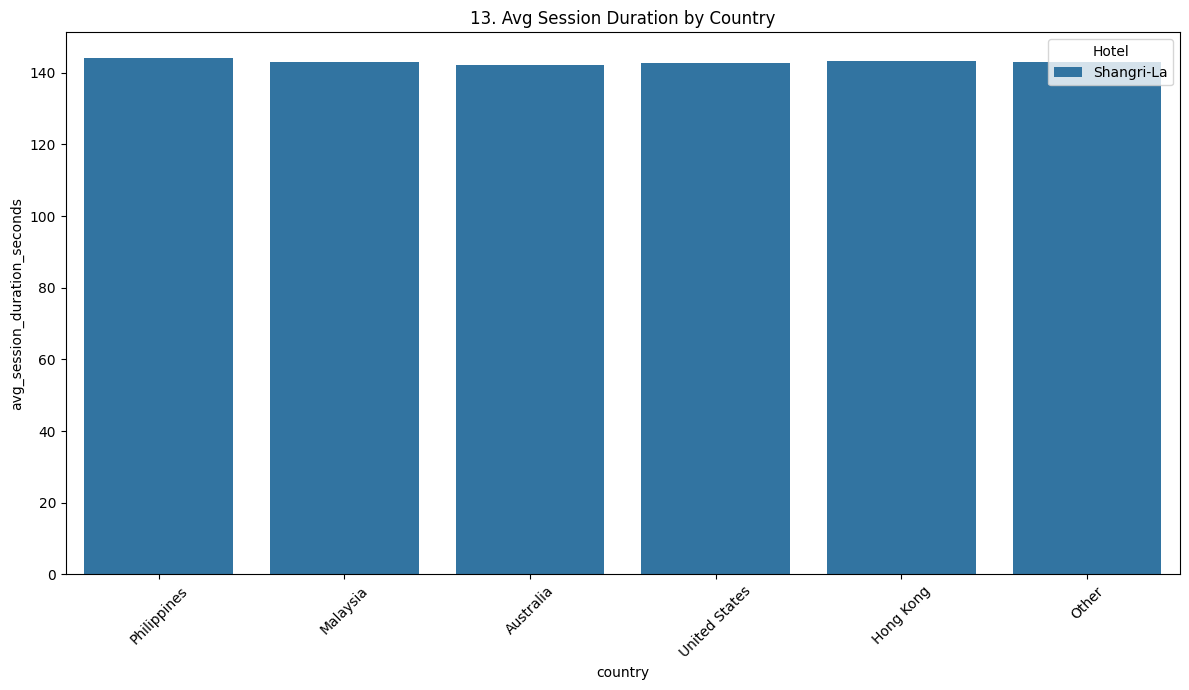

In [12]:
plot_combined_query({'Shangri-La': 'SELECT v.country, AVG(EXTRACT(EPOCH FROM session_duration)) AS avg_session_duration_seconds FROM shangri_access a JOIN shangri_visitor v ON a.visitor_id = v.visitor_id GROUP BY v.country;'}, 'country', 'avg_session_duration_seconds', '13. Avg Session Duration by Country', kind='bar')